In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
import os
from astropy.table import Table
dirname = "/Users/aphearin/Dropbox/UniverseMachine/data/histories/prelim_sfh_reduction"
history_fname = "sfh_catalog_1.002310_smcut_9.50_value_added_histories.hdf5"
histories = Table.read(os.path.join(dirname, history_fname), path='data')
cosmic_age_array = np.load(os.path.join(dirname, 'times.npy'))

## Create z=0 sample masks

In [21]:
histories['logssfr'] = np.log10(histories['sfr']/histories['sm'])

In [46]:
logsm_bins = np.arange(9.5, 11.75, 0.25)
sm_mask_array = np.zeros((len(logsm_bins)-1, len(histories)), dtype=bool)
quenched_sm_mask_array = np.zeros_like(sm_mask_array, dtype=bool)
active_sm_mask_array = np.zeros_like(sm_mask_array, dtype=bool)
centrals_sm_mask_array = np.zeros_like(sm_mask_array, dtype=bool)
quenched_centrals_sm_mask_array = np.zeros_like(sm_mask_array)
active_centrals_sm_mask_array = np.zeros_like(sm_mask_array)
satellites_sm_mask_array = np.zeros_like(sm_mask_array)
quenched_satellites_sm_mask_array = np.zeros_like(sm_mask_array)
active_satellites_sm_mask_array = np.zeros_like(sm_mask_array)

for ibin, logsm_low, logsm_high in zip(range(sm_mask_array.shape[0]), logsm_bins[:-1], logsm_bins[1:]):
    sm_mask_array[ibin, :] = (histories['sm'] >= 10**logsm_low) & (histories['sm'] < 10**logsm_high)
    quenched_sm_mask_array[ibin, :] = sm_mask_array[ibin, :]*(histories['logssfr'] <= -11)
    active_sm_mask_array[ibin, :] = sm_mask_array[ibin, :]*(histories['logssfr'] > -11)
    
    centrals_sm_mask_array[ibin, :] = sm_mask_array[ibin, :]*(histories['upid'] == -1)
    quenched_centrals_sm_mask_array[ibin, :] = centrals_sm_mask_array[ibin, :]*(histories['logssfr'] <= -11)
    active_centrals_sm_mask_array[ibin, :] = centrals_sm_mask_array[ibin, :]*(histories['logssfr'] > -11)
    
    satellites_sm_mask_array[ibin, :] = sm_mask_array[ibin, :]*(histories['upid'] != -1)
    quenched_satellites_sm_mask_array[ibin, :] = satellites_sm_mask_array[ibin, :]*(histories['logssfr'] <= -11)
    active_satellites_sm_mask_array[ibin, :] = satellites_sm_mask_array[ibin, :]*(histories['logssfr'] > -11)

## Calculate average ssfr histories

In [31]:
from history_functions import ssfr_histories

In [52]:
mean_ssfh_sm = np.zeros((sm_mask_array.shape[0], len(cosmic_age_array)))

for ibin in range(mean_ssfh_sm.shape[0]):
    mean_ssfh_sm[ibin, :] = np.mean(ssfr_histories(histories['sfh'][sm_mask_array[ibin,:]],
                                                   histories['smh'][sm_mask_array[ibin,:]]), axis=0)
                                                   

In [48]:
imask1 = 1
imask2 = -4

mean_ssfh_low_mass = np.mean(ssfr_histories(histories['sfh'][sm_mask_array[imask1,:]], 
                                            histories['smh'][sm_mask_array[imask1,:]]), axis=0)
mean_ssfh_high_mass = np.mean(ssfr_histories(histories['sfh'][sm_mask_array[imask2,:]], 
                                            histories['smh'][sm_mask_array[imask2,:]]), axis=0)

mean_ssfh_low_mass_q = np.mean(ssfr_histories(histories['sfh'][quenched_sm_mask_array[imask1,:]], 
                                            histories['smh'][quenched_sm_mask_array[imask1,:]]), axis=0)
mean_ssfh_low_mass_a = np.mean(ssfr_histories(histories['sfh'][active_sm_mask_array[imask1,:]], 
                                            histories['smh'][active_sm_mask_array[imask1,:]]), axis=0)


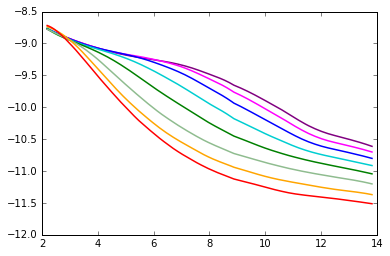

In [80]:
from scipy.signal import savgol_filter
ifirst=50

lw = 1.5
plt.plot(cosmic_age_array[ifirst:], savgol_filter(mean_ssfh_sm[0, ifirst:], 21, 3), 
         color='purple', linewidth=lw)

plt.plot(cosmic_age_array[ifirst:], savgol_filter(mean_ssfh_sm[1, ifirst:], 21, 3), 
         color='magenta', linewidth=lw)
plt.plot(cosmic_age_array[ifirst:], savgol_filter(mean_ssfh_sm[2, ifirst:], 21, 3), 
         color='blue', linewidth=lw)
plt.plot(cosmic_age_array[ifirst:], savgol_filter(mean_ssfh_sm[3, ifirst:], 21, 3), 
         color='darkturquoise', linewidth=lw)
plt.plot(cosmic_age_array[ifirst:], savgol_filter(mean_ssfh_sm[4, ifirst:], 21, 3), 
         color='green', linewidth=lw)
plt.plot(cosmic_age_array[ifirst:], savgol_filter(mean_ssfh_sm[5, ifirst:], 21, 3), 
         color='darkseagreen', linewidth=lw)
plt.plot(cosmic_age_array[ifirst:], savgol_filter(mean_ssfh_sm[6, ifirst:], 21, 3), 
         color='orange', linewidth=lw)
plt.plot(cosmic_age_array[ifirst:], savgol_filter(mean_ssfh_sm[7, ifirst:], 21, 3), 
         color='red', linewidth=lw)



In [42]:
cosmic_age_array[50]

2.1880741876528824